#Clase 1 - Curso ML - Práctica



## Dataset
Vamos a crear un dataset artificial con algo de ruido

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
np.random.seed(42)

In [2]:
numero_muestras = 20

x = np.linspace(0,1,num=numero_muestras).reshape(-1,1)

y =  2 * x+ np.sin(x*6)+ 0.5*np.random.randn(numero_muestras,1)

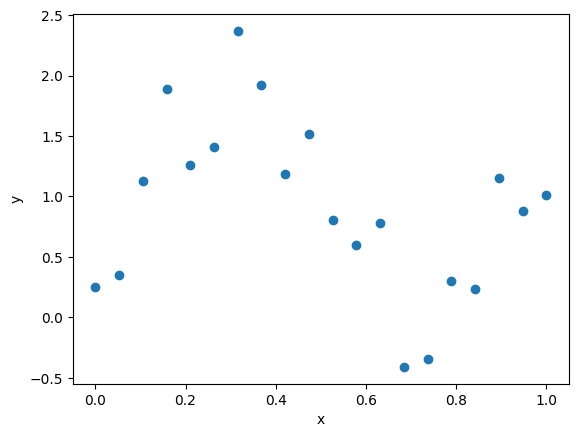

In [3]:
# TODO: Hacer un gráfico con plt.scatter() para ver cómo son los datos.

plt.scatter(x,y)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

### Train y Test
Vamos a dividir el dataset en train y test para hacer un modelo.
Se pueden ayudar con la [documentación de SKLearn](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

In [4]:
# Dividimos el dataset en train y test
from sklearn.model_selection import train_test_split

#TODO: completar
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.2)

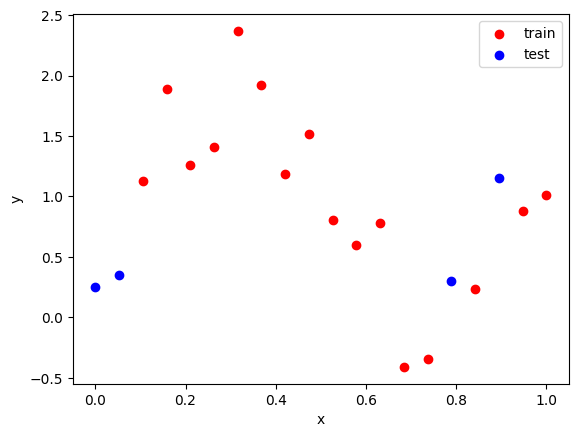

In [5]:
#TODO: hacer dos plt.scatter(), para graficar con distinto color los valores de train y de test.

plt.scatter(x_train,y_train, c='red', label='train')
plt.scatter(x_test,y_test, c='blue', label='test')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## Modelos
Vamos a probar varios modelos con este dataset para ver cómo funcionan.

El primer modelo que vamos a probar es una regresion lineal. Este algoritmo intenta ajustar los datos con una recta, minimizando algun error que por defecto es el error cuadratico medio ($RMSE$).

### Modelo lineal - LinearRegression

Primero importamos el modelo de la libreria de Sklearn

In [6]:
from sklearn.linear_model import LinearRegression

In [7]:
LinearRegression?

Luego definimos el modelo, en este cao lo llamamos "modelo_lineal". luego con el comando .fit() entrenamos el modelo.

In [8]:
modelo_lineal=LinearRegression()

In [9]:
modelo_lineal

LinearRegression()

Con el método [fit](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.fit) le pasamos los datos para el entrenamiento.

In [10]:
modelo_lineal.fit(x_train,y_train) #features, target

LinearRegression()

In [11]:
#Miramos los datos de test
x_test

array([[0.        ],
       [0.89473684],
       [0.78947368],
       [0.05263158]])

Vamos a ver cómo queda en el gráfico la función líneal que encontró el modelo.

Con `modelo_lineal.predict()` le podemos pedir que haga una predicción.

In [12]:
#TODO: hacer una predicción con los datos de test (x_test)
y_predi=modelo_lineal.predict(x_test)

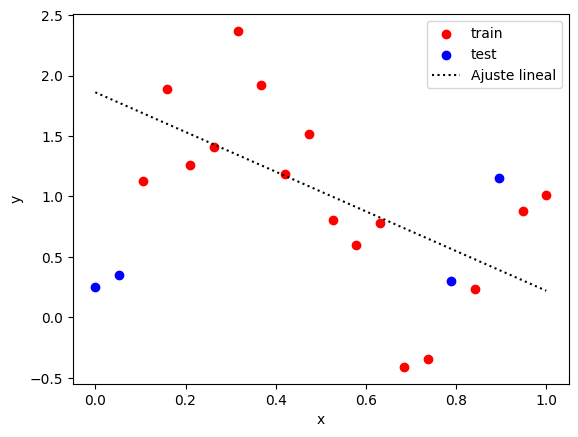

In [13]:
xvals=np.linspace(0,1,num=50).reshape(-1,1)
plt.scatter(x_train,y_train, c='red', label='train')
plt.scatter(x_test,y_test, c='b', label='test')

plt.plot(xvals,modelo_lineal.predict(xvals),color='black',linestyle='dotted',label='Ajuste lineal')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Una vez que entrene podemos realizar predicciones. Pero antes podemos pedirle que nos muestre cuales fueron los parametros que minimizaban el error.

In [14]:
print(modelo_lineal.intercept_,modelo_lineal.coef_)

[1.86157962] [[-1.64104645]]


#### Evaluacion del modelo

Necesitamos alguna forma de evaluar que tan bien le fue al modelo entrenado. Para esto usamos metricas de error. Para una regression la mas comun es el error cuadratico medio (RMSE). Sklearn nos proporciona la funcion que lo calculo automaticamente, salvo un detalle de la raiz cuadrada.

RMSE= $	\sqrt{\frac{1}{n}\sum(t_i-y_i)^2}$

In [15]:
from sklearn.metrics import mean_squared_error

def rmse(a,b):
    return np.sqrt(mean_squared_error(a,b))

con la funcion definida arriba calculamos el error en los datos de Train, Test

In [49]:
print("Error de entranemiento: ", rmse(a=y_train,b=modelo_lineal.predict(x_train)))
print("Error de test: ", rmse(y_test,y_predi))

Error de entranemiento:  0.5924886325099565
Error de test:  1.1504219008966168


### Modelo: Polinomio

Vamos a repetir todo lo anterior para un ajuste polinomico

Pueden leer un poco mas acá [PolynomialFeatures](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html)



In [17]:
from sklearn.preprocessing import PolynomialFeatures

In [50]:
#TODO: completar con grado del polinomio
grado = 20 #Pueden cambiar el valor para probar con otro grado, y ver cuál ajusta mejor.

pf = PolynomialFeatures(degree = grado) #defino la funcion ponlinomio,degree = grado

X_train_poli = pf.fit_transform(x_train.reshape(-1,1))


In [19]:
modelo_polinomio = LinearRegression()

modelo_polinomio.fit(X_train_poli, y_train)

LinearRegression()

Graficamos el polinomio con los datos:

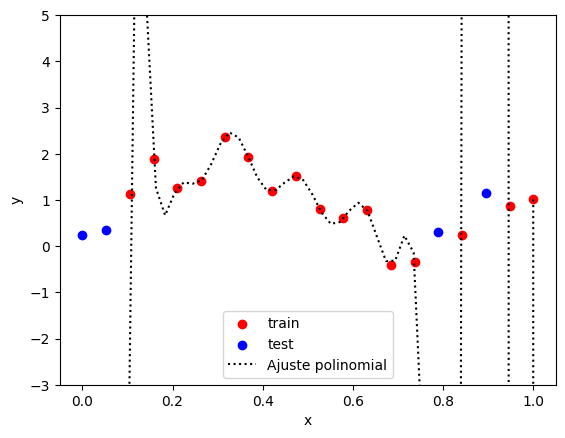

In [28]:
xvals=np.linspace(0,1,num=50).reshape(-1,1)

xvals_pre=pf.transform(xvals)

plt.scatter(x_train,y_train, c='red', label='train')
plt.scatter(x_test,y_test, c='b', label='test')

plt.plot(xvals,modelo_polinomio.predict(xvals_pre),color='black',linestyle='dotted',label='Ajuste polinomial')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.ylim(-3,5) #Pueden cambiar esto para hacer zoom en el gráfico

plt.show()

Analizar qué paso con el grado que eligieron. ¿Sirvio?

Comparar el resultado de $RMSE$ en los datos de test con el del modelo lineal. ¿Qué sucede con los datos de train?

In [26]:
X_test_poli = pf.fit_transform(x_test.reshape(-1,1))

#TODO: completar

print("Error de entranemiento: ", rmse(y_test,modelo_polinomio.predict(X_test_poli)))
print("Error de test: ", rmse(y_train,modelo_polinomio.predict(X_train_poli)))

Error de entranemiento:  5932.709624010698
Error de test:  2.7652822182029187e-06


#### Ejercicio
Con un `for` modelar los datos con polinomios de grado 1 hasta 20 y comparar las metricas(rmse: tanto en los datos de entrenamiento y de testeo)

In [29]:
# TODO

grados = np.arange(1,21)
errores_entrenamiento = []
errores_test = []


for grado in grados:
  pf = PolynomialFeatures(degree = grado) #defino la funcion ponlinomio,degree = grado
  X_train_poli = pf.fit_transform(x_train.reshape(-1, 1))

  modelo_polinomio = LinearRegression()
  modelo_polinomio.fit(X_train_poli, y_train)

  X_test_poli = pf.transform(x_test.reshape(-1, 1))

  error_train = rmse(y_train, modelo_polinomio.predict(X_train_poli))
  error_test = rmse(y_test, modelo_polinomio.predict(X_test_poli))

  errores_entrenamiento.append(error_train)
  errores_test.append(error_test)

  print(f"Grado: {grado}")
  print(f"Error de entrenamiento: {error_train}")
  print(f"Error de test: {error_test}")

Grado: 1
Error de entrenamiento: 0.5924886325099566
Error de test: 1.1504219008966166
Grado: 2
Error de entrenamiento: 0.5756676099956054
Error de test: 1.409992353766582
Grado: 3
Error de entrenamiento: 0.34256343062960176
Error de test: 0.6100613705171145
Grado: 4
Error de entrenamiento: 0.3424128836208629
Error de test: 0.5956027796446379
Grado: 5
Error de entrenamiento: 0.3133938125679299
Error de test: 1.272479943989191
Grado: 6
Error de entrenamiento: 0.30639860184922707
Error de test: 0.4758569972746482
Grado: 7
Error de entrenamiento: 0.3058965554408048
Error de test: 0.8871801189055608
Grado: 8
Error de entrenamiento: 0.3022418678078889
Error de test: 4.502201167489353
Grado: 9
Error de entrenamiento: 0.21453021463569924
Error de test: 44.373133546594254
Grado: 10
Error de entrenamiento: 0.20473141169835865
Error de test: 75.75927614475808
Grado: 11
Error de entrenamiento: 0.2037217215834295
Error de test: 47.158143085091
Grado: 12
Error de entrenamiento: 0.20342979012399998
E

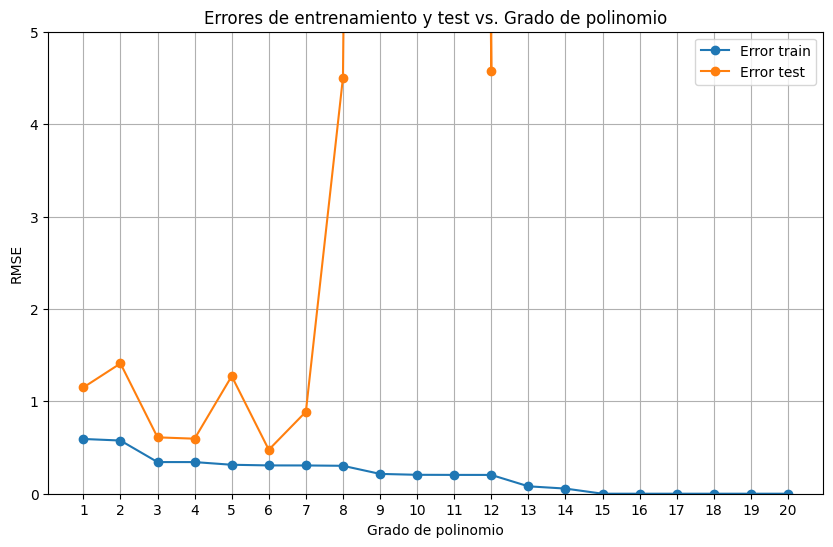

In [30]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 21), errores_entrenamiento, label='Error train', marker='o')
plt.plot(range(1, 21), errores_test, label='Error test', marker='o')
plt.title('Errores de entrenamiento y test vs. Grado de polinomio')
plt.xlabel('Grado de polinomio')
plt.ylabel('RMSE')
plt.legend()
plt.grid(True)
plt.xticks(range(1, 21))
plt.ylim(0, 5) #Mejorar la visualización poniendo limite en y
plt.show()

Vuelvan a la celda en la que crearon el polinomio y prueben poniendo el grado que menor error en los datos de test tiene.

Noten como el error de entrenamiento (en azul) siempre disminuye, tendiendo a 0. Sin embargo a partir de $grado=7$, el error de test empieza a crecer muy rápido. Lo que vemos es un caso de $overfitting$.


### Modelo: Decision tree regressor

La idea es repetir el proceso realizado con el modelo lineal pero usando un algoritmo mas avanzado: Decision tree regressor.

In [31]:
from sklearn.tree import DecisionTreeRegressor

In [32]:
DecisionTreeRegressor?

In [33]:
arbol=DecisionTreeRegressor()
arbol.fit(x_train,y_train)

DecisionTreeRegressor()

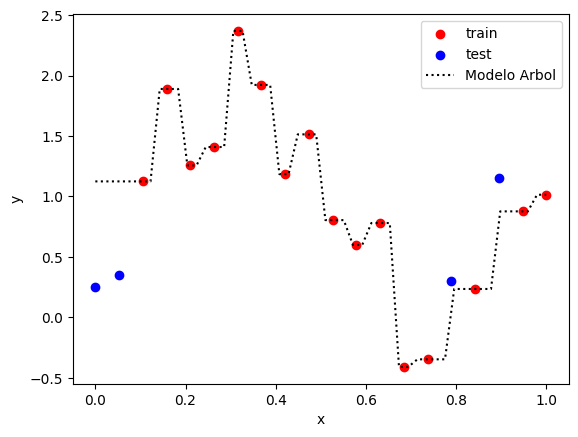

In [34]:
plt.scatter(x_train,y_train, c='red', label='train')
plt.scatter(x_test,y_test, c='b', label='test')

plt.plot(xvals,arbol.predict(xvals),color='black',linestyle='dotted',label='Modelo Arbol')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [39]:
print("Error de entranemiento: ", rmse(y_train, arbol.predict(x_train)))
print("Error de test: ", rmse(y_test, arbol.predict(x_test)))

Error de entranemiento:  0.0
Error de test:  0.745351638133894


Vemos que esta overfiteando los datos.
Podemos intentar regularizar el modelo con *max_depth* (profundidad del arbol)

[DecisionTreeRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html)

In [44]:
#TODO: incluir el hiper parámetro max_depth para que no haga overfitting
arbol2 = DecisionTreeRegressor(max_depth=2)
arbol2.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=2)

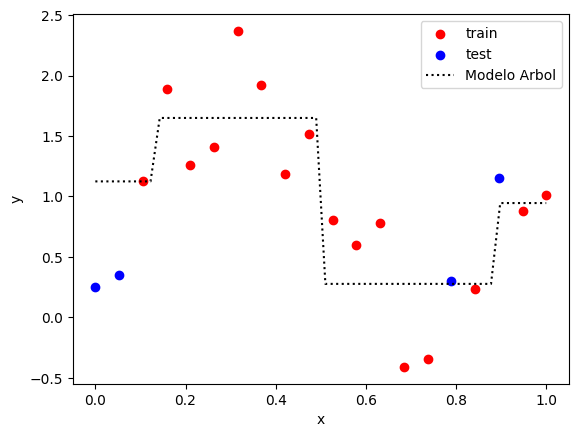

In [45]:
plt.scatter(x_train,y_train, c='red', label='train')
plt.scatter(x_test,y_test, c='b', label='test')

plt.plot(xvals,arbol2.predict(xvals),color='black',linestyle='dotted',label='Modelo Arbol')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [46]:
from sklearn.metrics import mean_squared_error

def rmse(a,b):
    return np.sqrt(mean_squared_error(a,b)) #a es el valor real (dato), b es el valor del modelo

In [47]:
#TODO: completar para analizar los errores

print("Error de entranemiento: ", rmse(y_train, arbol2.predict(x_train)))
print("Error de test: ", rmse(y_test, arbol2.predict(x_test)))


Error de entranemiento:  0.4033942149454794
Error de test:  0.731962710366203


Pueden probar cómo cambian los errores cambiando `max_depth`. Si llegan pueden hacer como el ejercicio de modelo polinomial, con un for probando distintas profundidades.